In [1]:
from math import sqrt
from random import randint
from typing import Any

import pandas as pd
import seaborn as sb
from lightning_lite import seed_everything
from pytorch_lightning import Trainer
from sklearn import preprocessing

from custom_lib import Model, Data

/Users/sonodakazuto/.pyenv/versions/3.10.8/envs/ML-Final_Project/lib/python3.10/site-packages/pl_bolts/callbacks/data_monitor.py:20: UnderReviewWarning: The feature warn_missing_pkg is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  warn_missing_pkg("wandb")
/Users/sonodakazuto/.pyenv/versions/3.10.8/envs/ML-Final_Project/lib/python3.10/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:35: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": gener

In [2]:
%matplotlib inline
sb.set()

# Data Processing

In [3]:
data_set: Any = pd.read_csv('data/train_data.csv', encoding='utf-8')
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3070 entries, 0 to 3069
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         3070 non-null   object
 1   City            3050 non-null   object
 2   Country         3068 non-null   object
 3   Industry        3070 non-null   object
 4   Investor        2940 non-null   object
 5   Last Valuation  3070 non-null   int64 
 6   Unicorn         3070 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 168.0+ KB


In [4]:
data_set.head()

,Company,City,Country,Industry,Investor,Last Valuation,Unicorn
0,Slingshot Aerospace,Austin,United States,Aerospace,Techstars,200000000,0
1,Deepgram,San Francisco,United States,Artificial intelligence,NVIDIA,250000000,0
2,Sense,Cambridge,United States,Consumer Electronics,Schneider Electric,550000000,0
3,Zume,Camarillo,United States,Consumer,FJ Labs,2250000000,1
4,Plant Prefab,Rialto,United States,Architecture,ICT Capital,100000000,0


## Company Name

In [5]:
company: list = data_set['Company'].tolist()

In [6]:
def count_special_char(name: str) -> int:
	special_char: list = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';',
						  '<', '=', '>', '?', '@']
	special_char_count: int = 0
	for c in name:
		if c in special_char:
			special_char_count += 1

	return special_char_count

In [7]:
company_length: list = [len(c) for c in company]
company_special: list = [count_special_char(c) for c in company]

In [8]:
data_set.insert(0, 'Company Name Length', company_length)
data_set.insert(1, 'Company Name #Special Char', company_special)
data_set.drop('Company', axis=1, inplace=True)

In [9]:
data_set.head()

,Company Name Length,Company Name #Special Char,City,Country,Industry,Investor,Last Valuation,Unicorn
0,19,0,Austin,United States,Aerospace,Techstars,200000000,0
1,8,0,San Francisco,United States,Artificial intelligence,NVIDIA,250000000,0
2,5,0,Cambridge,United States,Consumer Electronics,Schneider Electric,550000000,0
3,4,0,Camarillo,United States,Consumer,FJ Labs,2250000000,1
4,12,0,Rialto,United States,Architecture,ICT Capital,100000000,0


## Country

In [10]:
data_set['Country'] = data_set['Country'].str.lower()
data_set['Country'].value_counts()

united states           2506
china                    173
india                     70
united kingdom            50
germany                   30
israel                    24
france                    24
canada                    19
south korea               17
brazil                    16
singapore                 14
sweden                     8
mexico                     8
australia                  8
indonesia                  7
hong kong                  7
netherlands                7
japan                      6
switzerland                6
ireland                    6
spain                      5
finland                    5
norway                     5
united arab emirates       4
belgium                    3
turkey                     3
thailand                   3
colombia                   3
philippines                2
chile                      2
italy                      2
south africa               2
lithuania                  2
croatia                    2
austria       

In [11]:
def country_mapping(country_name: str) -> int:
	country: dict = {'united states': 0, 'china': 1}
	if country_name in country.keys():
		return country[country_name]
	return len(country)

In [12]:
data_set['Country'] = data_set['Country'].map(country_mapping)

In [13]:
data_set['Country'].fillna(0, inplace=True)

In [14]:
data_set.head()

,Company Name Length,Company Name #Special Char,City,Country,Industry,Investor,Last Valuation,Unicorn
0,19,0,Austin,0,Aerospace,Techstars,200000000,0
1,8,0,San Francisco,0,Artificial intelligence,NVIDIA,250000000,0
2,5,0,Cambridge,0,Consumer Electronics,Schneider Electric,550000000,0
3,4,0,Camarillo,0,Consumer,FJ Labs,2250000000,1
4,12,0,Rialto,0,Architecture,ICT Capital,100000000,0


## City


In [15]:
data_set['City'] = data_set['City'].str.lower()
data_set['City'].value_counts()

san francisco            480
new york                 365
boston                    97
palo alto                 72
los angeles               66
                        ... 
north charleston           1
wayland                    1
lake oswego                1
honolulu                   1
la plaine saint-denis      1
Name: City, Length: 502, dtype: int64

In [16]:
def city_mapping(city_name: str) -> int:
	city: dict = {'san francisco': 0, 'new york': 1}
	if city_name in city.keys():
		return city[city_name]
	return len(city)

In [17]:
data_set['City'] = data_set['City'].map(city_mapping)

In [18]:
data_set['City'].fillna(data_set.groupby('Country')['City'].transform(lambda x: x.mode().iat[0]), inplace=True)

In [19]:
data_set.head()

,Company Name Length,Company Name #Special Char,City,Country,Industry,Investor,Last Valuation,Unicorn
0,19,0,2,0,Aerospace,Techstars,200000000,0
1,8,0,0,0,Artificial intelligence,NVIDIA,250000000,0
2,5,0,2,0,Consumer Electronics,Schneider Electric,550000000,0
3,4,0,2,0,Consumer,FJ Labs,2250000000,1
4,12,0,2,0,Architecture,ICT Capital,100000000,0


## Industry

In [20]:
data_set['Industry'] = data_set['Industry'].str.lower()
data_set['Industry'].value_counts()

artificial intelligence         239
fintech                         235
internet software & services    197
analytics                       151
biotechnology                   131
                               ... 
robotics                          1
product design                    1
film production                   1
dating                            1
consumer & retail                 1
Name: Industry, Length: 272, dtype: int64

In [21]:
def industry_mapping(industry_name: str) -> int:
	industry: dict = {'artificial intelligence': 0, 'fintech': 1, 'internet software & services': 2, 'analytics': 3, 'biotechnology': 4, 'health care': 5,
					  'e-commerce & direct-to-consumer': 6}
	if industry_name in industry.keys():
		return industry[industry_name]
	return len(industry)

In [22]:
data_set['Industry'] = data_set['Industry'].map(industry_mapping)

In [23]:
data_set.head()

,Company Name Length,Company Name #Special Char,City,Country,Industry,Investor,Last Valuation,Unicorn
0,19,0,2,0,7,Techstars,200000000,0
1,8,0,0,0,0,NVIDIA,250000000,0
2,5,0,2,0,7,Schneider Electric,550000000,0
3,4,0,2,0,7,FJ Labs,2250000000,1
4,12,0,2,0,7,ICT Capital,100000000,0


## Investor

In [24]:
data_set['Investor'] = data_set['Investor'].str.lower()
data_set['Investor'].value_counts()

andreessen horowitz       88
techstars                 77
alumni ventures           66
y combinator              63
sequoia capital           60
                          ..
davis capital partners     1
james parker               1
sacramento angels          1
jmcr partners              1
l capital partners         1
Name: Investor, Length: 1255, dtype: int64

In [25]:
def investor_mapping(investor_name: str) -> int:
	investor: dict = {'andreessen horowitz': 0, 'techstars': 1, 'alumni ventures': 2, 'y combinator': 3, 'sequoia capital': 4, '500 global': 5,
					  'insight partners': 6}
	if investor_name in investor.keys():
		return investor[investor_name]
	return len(investor)

In [26]:
data_set['Investor'] = data_set['Investor'].map(investor_mapping)

In [27]:
data_set['Investor'].fillna(0, inplace=True)

In [28]:
data_set.head()

,Company Name Length,Company Name #Special Char,City,Country,Industry,Investor,Last Valuation,Unicorn
0,19,0,2,0,7,1,200000000,0
1,8,0,0,0,0,7,250000000,0
2,5,0,2,0,7,7,550000000,0
3,4,0,2,0,7,7,2250000000,1
4,12,0,2,0,7,7,100000000,0


## Last Valuation

In [29]:
data_set['Last Valuation'].value_counts()

1000000000    281
15000000      152
10000000      146
150000000     141
200000000     135
             ... 
505000000       1
475000000       1
460000000       1
445000000       1
6700000000      1
Name: Last Valuation, Length: 388, dtype: int64

In [30]:
def valuation_mapping(valuation: int) -> int:
	half = sqrt(10)
	scientific: list = '{:e}'.format(valuation).split('e')
	tail: float = float(scientific[0])
	power: int = int(scientific[1])
	if tail >= half:
		power += 1

	return power

In [31]:
data_set['Last Valuation'] = data_set['Last Valuation'].map(valuation_mapping)

In [32]:
data_set.head()

,Company Name Length,Company Name #Special Char,City,Country,Industry,Investor,Last Valuation,Unicorn
0,19,0,2,0,7,1,8,0
1,8,0,0,0,0,7,8,0
2,5,0,2,0,7,7,9,0
3,4,0,2,0,7,7,9,1
4,12,0,2,0,7,7,8,0


# Correlation

In [33]:
# data_set.drop('Last Valuation', axis=1, inplace=True)
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_data = pd.DataFrame(data_scaler.fit_transform(data_set.drop('Unicorn', axis=1)), columns=data_set.drop('Unicorn', axis=1).columns)
scaled_data['Unicorn'] = data_set['Unicorn']

<AxesSubplot: >

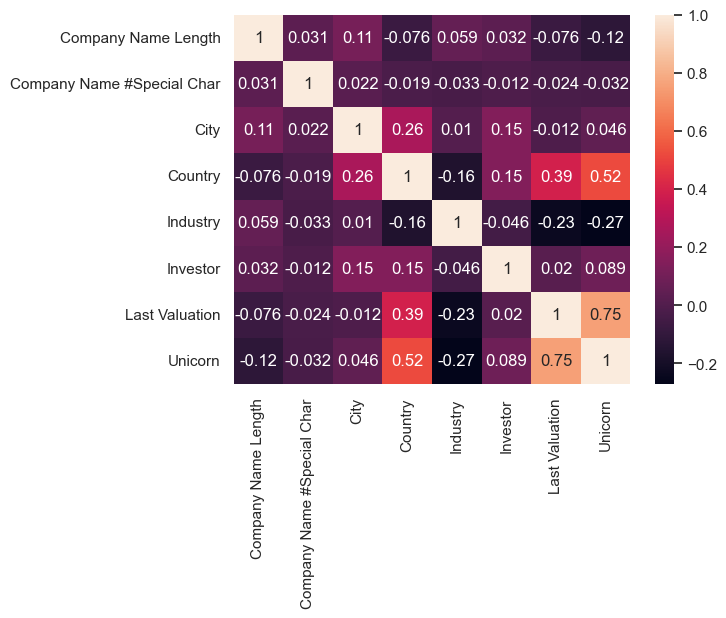

In [34]:
sb.heatmap(scaled_data.corr(), annot=True)

# Training

In [ ]:
scaled_data.info()

In [ ]:
max_epoch: int = 10

In [ ]:
seed_everything(randint(0, 37710), workers=True)
classifier = Model.Model()
data_loader = Data.DataModule(data=scaled_data)
trainer = Trainer(max_epochs=max_epoch, check_val_every_n_epoch=1)

In [ ]:
print(classifier)

# Train

In [ ]:
classifier.unfreeze()
trainer.fit(classifier, datamodule=data_loader)

# Test

In [ ]:
classifier.freeze()
trainer.test(classifier, datamodule=data_loader, verbose=True)